In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
img=cv2.imread(r"C:\Users\SIVA PC\Downloads\CelebrityFaceRecognition\model\test_images\sharapova1.jpg")
img.shape

(555, 700, 3)

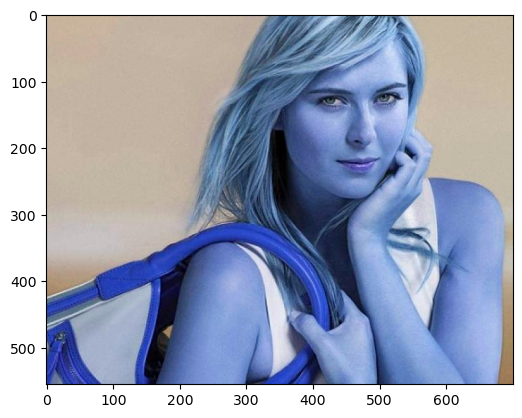

In [5]:
plt.imshow(img)

In [6]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

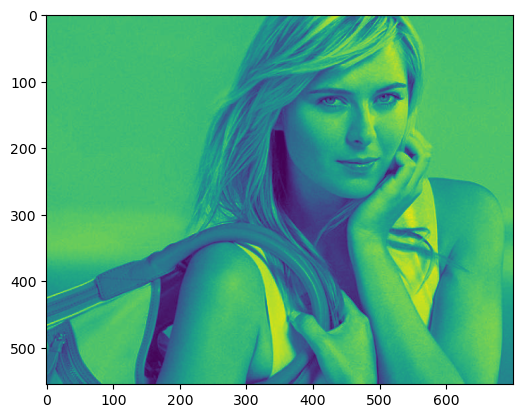

In [7]:
plt.imshow(gray)

In [16]:
#Haar cascade face detection technique
face_cascade=cv2.CascadeClassifier(r"C:\Users\SIVA PC\Downloads\CelebrityFaceRecognition\model\opencv\haarcascades\haarcascade_frontalface_default.xml")
eyes_cascade=cv2.CascadeClassifier(r"C:\Users\SIVA PC\Downloads\CelebrityFaceRecognition\model\opencv\haarcascades\haarcascade_eye.xml")
faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[352,  38, 233, 233]])

In [17]:
x,y,w,h=faces[0]
x,y,w,h

(352, 38, 233, 233)

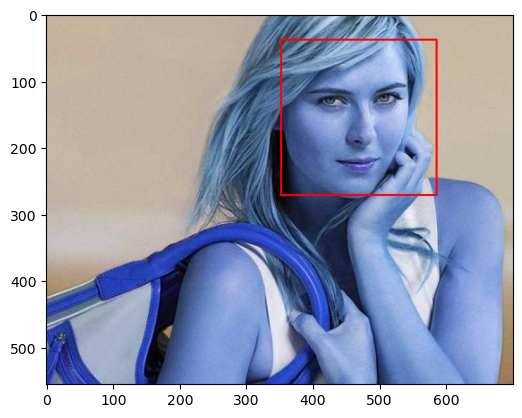

In [18]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

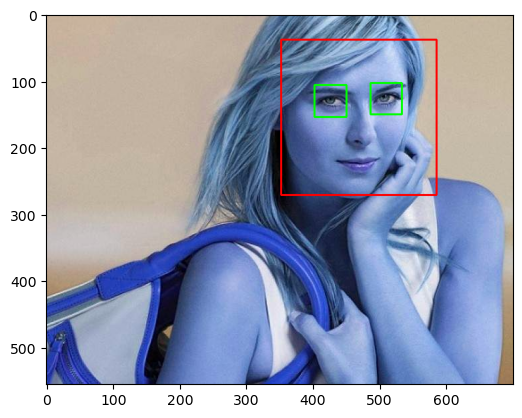

In [19]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eyes_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

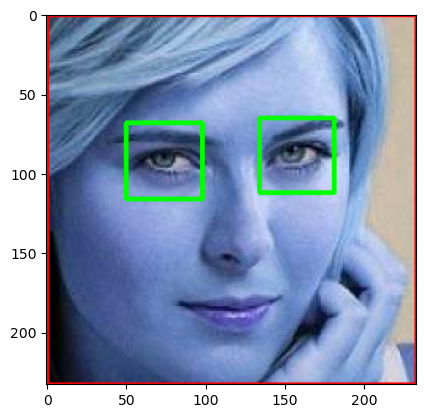

In [22]:
plt.imshow(roi_color)

In [24]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eyes_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

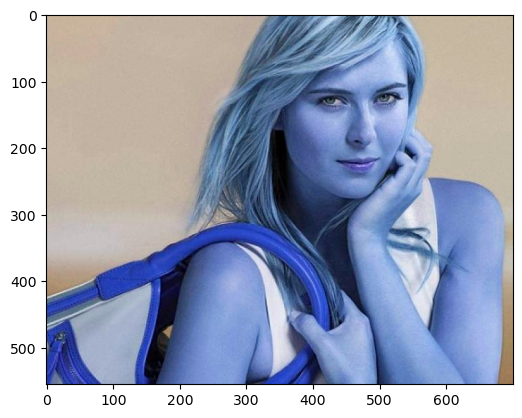

In [32]:
original_image = cv2.imread(r"C:\Users\SIVA PC\Downloads\CelebrityFaceRecognition\model\test_images\sharapova1.jpg")
plt.imshow(original_image)

In [ ]:
cropped_image = get_cropped_image_if_2_eyes(r'C:\Users\SIVA PC\Downloads\CelebrityFaceRecognition\model\test_images\sharapova1.jpg')
plt.imshow(cropped_image)

In [33]:
path_to_data=r'C:\Users\SIVA PC\Downloads\CelebrityFaceRecognition\images_dataset'
path_to_crpdata=r'C:\Users\SIVA PC\Downloads\CelebrityFaceRecognition\images_dataset\cropped'

In [34]:
import os

img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [35]:
img_dirs

['C:\\Users\\SIVA PC\\Downloads\\CelebrityFaceRecognition\\images_dataset\\lionel_messi',
 'C:\\Users\\SIVA PC\\Downloads\\CelebrityFaceRecognition\\images_dataset\\maria_sharapova',
 'C:\\Users\\SIVA PC\\Downloads\\CelebrityFaceRecognition\\images_dataset\\roger_federer',
 'C:\\Users\\SIVA PC\\Downloads\\CelebrityFaceRecognition\\images_dataset\\serena_williams',
 'C:\\Users\\SIVA PC\\Downloads\\CelebrityFaceRecognition\\images_dataset\\virat_kohli']

In [36]:
import shutil

if os.path.exists(path_to_crpdata):
    shutil.rmtree(path_to_crpdata)
os.mkdir(path_to_crpdata)

In [38]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    directory, last_component = os.path.split(img_dir)
    celebrity_name = last_component
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = os.path.join(path_to_crpdata,celebrity_name)
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    
                
            

Generating cropped images in folder:  C:\Users\SIVA PC\Downloads\CelebrityFaceRecognition\images_dataset\cropped\lionel_messi
Generating cropped images in folder:  C:\Users\SIVA PC\Downloads\CelebrityFaceRecognition\images_dataset\cropped\maria_sharapova
Generating cropped images in folder:  C:\Users\SIVA PC\Downloads\CelebrityFaceRecognition\images_dataset\cropped\roger_federer
Generating cropped images in folder:  C:\Users\SIVA PC\Downloads\CelebrityFaceRecognition\images_dataset\cropped\serena_williams
Generating cropped images in folder:  C:\Users\SIVA PC\Downloads\CelebrityFaceRecognition\images_dataset\cropped\virat_kohli


In [39]:
# Wavelet transform to extract features
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

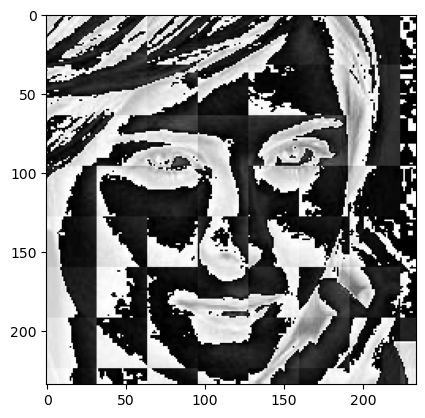

In [30]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')


In [40]:
celebrity_file_names_dict

{'lionel_messi': ['C:\\Users\\SIVA PC\\Downloads\\CelebrityFaceRecognition\\images_dataset\\cropped\\lionel_messi/lionel_messi1.png',
  'C:\\Users\\SIVA PC\\Downloads\\CelebrityFaceRecognition\\images_dataset\\cropped\\lionel_messi/lionel_messi2.png',
  'C:\\Users\\SIVA PC\\Downloads\\CelebrityFaceRecognition\\images_dataset\\cropped\\lionel_messi/lionel_messi3.png',
  'C:\\Users\\SIVA PC\\Downloads\\CelebrityFaceRecognition\\images_dataset\\cropped\\lionel_messi/lionel_messi4.png',
  'C:\\Users\\SIVA PC\\Downloads\\CelebrityFaceRecognition\\images_dataset\\cropped\\lionel_messi/lionel_messi5.png',
  'C:\\Users\\SIVA PC\\Downloads\\CelebrityFaceRecognition\\images_dataset\\cropped\\lionel_messi/lionel_messi6.png',
  'C:\\Users\\SIVA PC\\Downloads\\CelebrityFaceRecognition\\images_dataset\\cropped\\lionel_messi/lionel_messi7.png',
  'C:\\Users\\SIVA PC\\Downloads\\CelebrityFaceRecognition\\images_dataset\\cropped\\lionel_messi/lionel_messi8.png',
  'C:\\Users\\SIVA PC\\Downloads\\Celebr

In [41]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

## Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [42]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [43]:
len(X)

158

In [44]:
32*32*3 + 32*32

4096

In [47]:
X[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [49]:
y[0]

0

In [50]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(158, 4096)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000,C=1)

In [54]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=6)

In [55]:
model.fit(xtrain,ytrain)

LogisticRegression(C=1, max_iter=5000)

In [65]:
prediction=model.predict(xtest)
prediction

array([0, 0, 3, 3, 1, 3, 0, 0, 2, 1, 2, 1, 3, 3, 4, 4, 2, 2, 4, 4, 2, 0,
       4, 1, 3, 1, 4, 4, 1, 2, 1, 2, 0, 1, 0, 0, 1, 4, 0, 0, 4, 3, 2, 1,
       3, 1, 0, 1, 2, 4, 0, 2, 3])

In [57]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.83      0.91      0.87        11
           2       0.70      0.88      0.78         8
           3       0.78      0.58      0.67        12
           4       1.00      1.00      1.00        10

    accuracy                           0.85        53
   macro avg       0.85      0.86      0.85        53
weighted avg       0.85      0.85      0.85        53



In [58]:
# Fitting SVC Classification to the Training set with linear kernel
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'linear', C=1)
svcclassifier.fit(xtrain, ytrain)

# Predicting the Test set results
y_pred = svcclassifier.predict(xtest)
print(y_pred)

[0 1 3 3 1 3 4 0 1 1 2 1 3 3 4 4 2 2 4 4 2 0 4 1 3 1 4 4 1 2 1 2 0 1 0 0 3
 4 0 0 4 3 2 1 3 1 0 1 2 4 1 2 3]


In [59]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.79      1.00      0.88        11
           2       0.67      0.75      0.71         8
           3       0.80      0.67      0.73        12
           4       0.91      1.00      0.95        10

    accuracy                           0.83        53
   macro avg       0.83      0.83      0.82        53
weighted avg       0.84      0.83      0.83        53



## We are choosing the Log Regression model


## Saving the model

In [66]:
import pickle

In [67]:
with open ("sportsclassifier.pkl",'wb') as models:
    pickle.dump(svcclassifier,models)

## Saving the dictionary

In [68]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))